<a href="https://colab.research.google.com/github/kyllianj/M2_Data_Mining/blob/main/Introduction_to_Neural_Nets_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD 1 Introduction to Artificial Neural Networks

### Usage of this notebook
- __run a cell__ with **_ctrl-enter_** or **_shift-enter_**
- __use the command palette__ with **_ctrl-shift-P_** to find more complex commands

Use it preferably with __Chrome__ or __Edge__



In [ ]:
# Numpy, the scientific computing package
import numpy as np

# Time package
import time

# Keras, deep learning library, used here only to load the MNIST dataset
#import keras
from keras.datasets import mnist
from keras.utils import np_utils

# Visualization packages
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## **Exercise 1: Create a "NOT" gate with 1 single neuron step by step & train it**

The NOT gate simply converts 0 to 1 and 1 to 0.

- 1.1. Define inputs & output (type is numpy array)
- 1.2. Initialize randomly the weight matrix: the weight matrix has two dimentions: 
    - First dimension is the number of input features +1 
    - Second dimention is the number of neurons
    (use the numpy random function)
- 1.3. Create a neuron, i.e. compute neuron output: dot product of input and weights (note that the bias has already been added for you)

In [ ]:
# 1.1
X = np.array([[1],[0]])
Y = np.array([[0],[1]])

print("Input: \n{}".format(X))
print("Output: \n{}".format(Y))

# 1.2
W = np.random.normal(size=(X.shape[1]+1, 1))

print("Weights matrix: \n{}".format(W))

#1.3
def compute(W,X):
    # Add the bias (x0) to input
    X_bias = np.insert(X, 0, 1, axis=1)
    # Dot product of input and weights
    return X_bias.dot(W) # Remember to use the .dot() function

print("Neuron output: \n{}".format(compute(W,X)))

Input: 
[[1]
 [0]]
Output: 
[[0]
 [1]]
Weights matrix: 
[[-0.63327138]
 [-2.37066633]]
Neuron output: 
[[-3.00393771]
 [-0.63327138]]


- 1.4. Implement an activation function: let's start by creating a function for sigmoid to squash neuron output to ]0,1[ range

> As a reminder the sigmoid function expression is:

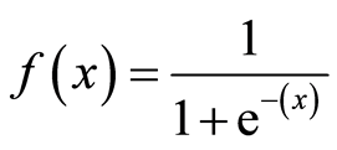

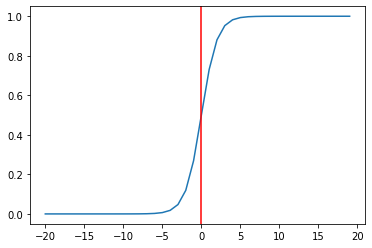

Neuron + logistic activation: 
[[0.0472483 ]
 [0.34676913]]


In [ ]:
#1.4
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-20, 20)
plt.plot(x, sigmoid(x))
plt.axvline(0,color='r')
plt.show()

print("Neuron + logistic activation: \n{}".format(sigmoid(compute(W,X))))

#### Measure the neuron error: accuracy & loss
- 1.5. How good is your model? Write a function to measure similarity between prediction and expected output (accuracy)

Tip: any output > 0.5 will be considered as 1 & any output < 0.5 will be considered as 0. We will take the average of all the predictions.
Compare Y_pred and Y and use np.mean on result

In [ ]:
# 1.5 
def binary_accuracy(Y_pred,Y):
    """Measure similarity between prediction and expected output"""
    return np.mean(((Y_pred > 0.5) == Y)) # Compare Y_pred and Y and use np.mean on result

print("Accuracy: \n{}".format(binary_accuracy(sigmoid(compute(W,X)),Y)))

Accuracy: 
0.5


##### **Let's observe:** accuracy can be associated to discrete areas... Not quite easy to derive it right?
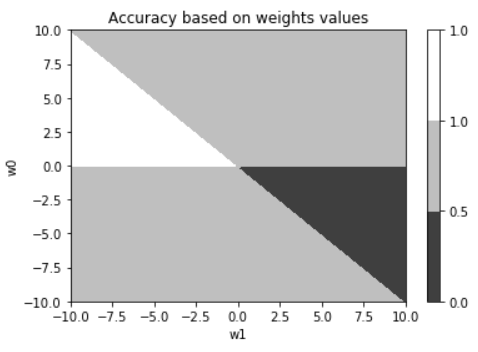                   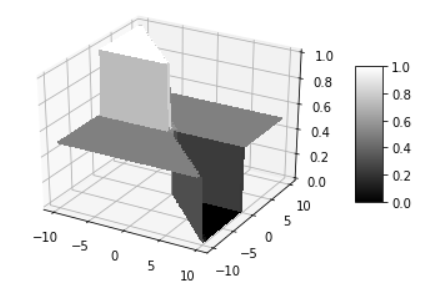

In [ ]:
# Assuming we have the predictions below out of neuron
my_Y_predictions = np.array([[[.9],[.1]],
                             [[.49],[.49]],
                             [[.1],[.9]],
                             [[.01],[.99]]])

# Then let's look at what accuracy would be
for Y_pred in my_Y_predictions:
    print("My (forged) prediction:\n{}\nAccuracy: {}\n".format(Y_pred, binary_accuracy(Y_pred,Y)))

#### The Binary Cross Entropy loss function:
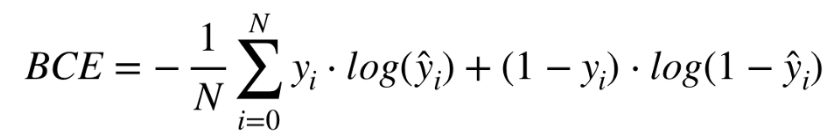

- 1.6. Write a function for BCE that we will call log_loss

In [ ]:
# 1.6
def log_loss(Y_pred,Y, X):
    return -np.sum(np.log(Y_pred) * Y + np.log(1 - Y_pred) * (1-Y)) / X.shape[0]

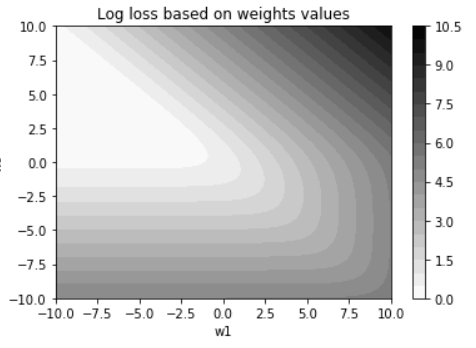

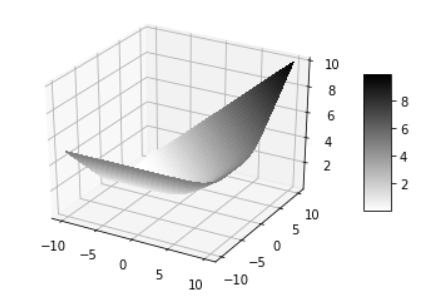

**Let's observe:** Loss and accuracy are not the same thing!

Sometimes better loss means lower accuracy (and vice versa)

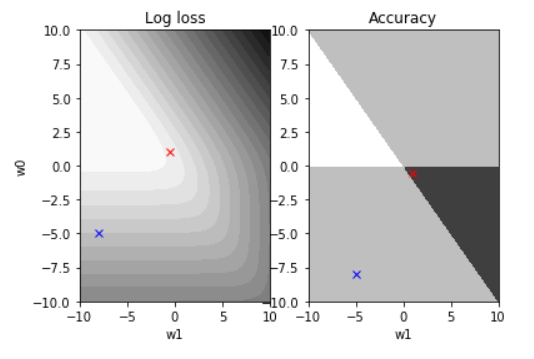

In [ ]:
# Let's observe: assuming we have the predictions below out of neuron
my_Y_predictions = np.array([[[.9],[.1]],
                             [[.49],[.49]],
                             [[.1],[.9]],
                             [[.01],[.99]]])

# Then let's look at what loss would be compared to accuracy
for Y_pred in my_Y_predictions:
    print("My (forged) prediction:\n{}\nLoss: {:.3f}\nAccuracy: {}\n".format(Y_pred, log_loss(Y_pred,Y, X),binary_accuracy(Y_pred,Y)))

My (forged) prediction:
[[0.9]
 [0.1]]
Loss: 2.303
Accuracy: 0.0

My (forged) prediction:
[[0.49]
 [0.49]]
Loss: 0.693
Accuracy: 0.5

My (forged) prediction:
[[0.1]
 [0.9]]
Loss: 0.105
Accuracy: 1.0

My (forged) prediction:
[[0.01]
 [0.99]]
Loss: 0.010
Accuracy: 1.0



## Let's do backpropagation on our neuron by learning to the weights using the loss gradient



- 1.7 Write the log loss gradient function

In [ ]:
# 1.7
def log_loss_grad(Y_pred, Y, X):
    X_bias = np.insert(X, 0, 1, axis=1)
    return (X_bias.T.dot(Y_pred - Y)) / X.shape[0]

# Let's observe: assuming we have the predictions below out of neuron
my_Y_predictions = np.array([[[.9],[.1]],
                             [[.49],[.49]],
                             [[.1],[.9]],
                             [[.01],[.99]]])

for Y_pred in my_Y_predictions:
    print("My (forged) prediction:\n{}\nLoss gradient\n{}\n".format(Y_pred, log_loss_grad(Y_pred,Y, X)))

My (forged) prediction:
[[0.9]
 [0.1]]
Loss gradient
[[0.  ]
 [0.45]]

My (forged) prediction:
[[0.49]
 [0.49]]
Loss gradient
[[-0.01 ]
 [ 0.245]]

My (forged) prediction:
[[0.1]
 [0.9]]
Loss gradient
[[1.38777878e-17]
 [5.00000000e-02]]

My (forged) prediction:
[[0.01]
 [0.99]]
Loss gradient
[[-4.33680869e-18]
 [ 5.00000000e-03]]



## Let's train our neuron in the next exercise!


Step   0 Loss=1.0738 Accuracy=0.000
[[0.76557971]
 [0.49807972]]
Step  10 Loss=0.6397 Accuracy=0.500
[[0.41059965]
 [0.47203189]]
Step  20 Loss=0.4633 Accuracy=1.000
[[0.29287433]
 [0.5598472 ]]
Step  30 Loss=0.3535 Accuracy=1.000
[[0.23242146]
 [0.64238482]]
Step  40 Loss=0.2809 Accuracy=1.000
[[0.19156995]
 [0.70533773]]
Step  50 Loss=0.2305 Accuracy=1.000
[[0.16168554]
 [0.75221407]]
Step  60 Loss=0.1942 Accuracy=1.000
[[0.13905982]
 [0.78761374]]
Step  70 Loss=0.1671 Accuracy=1.000
[[0.12149786]
 [0.81493745]]
Step  80 Loss=0.1462 Accuracy=1.000
[[0.10757033]
 [0.83649489]]
Step  90 Loss=0.1296 Accuracy=1.000
[[0.09631306]
 [0.85384579]]

Total training time: 0.027 seconds


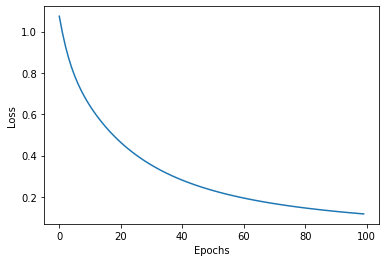

In [ ]:
# Redefine inputs and expected outputs in case they have been erased or modified
X = np.array([[1],[0]])
Y = np.array([[0],[1]])

# Other parameters: nb neurons in the layer, epochs (nb of training iterations), learning rate
nb_neurons=1
epochs=100
learning_rate=0.5

# Randomly initialize the weights
W = np.random.normal(size=(X.shape[1]+1, nb_neurons))

# Record the training start time
start = time.time()

# Initialize empty list to store losses (for later plotting)
losses = []

# Run gradient descent
for i in range(epochs):

    # Compute prediction with current weights values
    Y_pred = sigmoid(compute(W,X)) # Use the compute and activation functions

    # Compute loss and store it (for plotting)
    current_loss = log_loss(Y_pred, Y, X) # Use the loss function
    losses.append(current_loss)

    # Update the weights matrix based on loss gradient
    W = W - learning_rate * log_loss_grad(Y_pred, Y, X) # from W discount the loss gradient multiplied by the learning rate

    # Report training progresses
    if i%(epochs//10) == 0:
        acc = binary_accuracy(Y_pred, Y)
        print("Step {:3d} Loss={:.4f} Accuracy={:.3f}".format(i, current_loss, acc ))
        print(Y_pred)

# Report total training time
print("\nTotal training time: {:.3f} seconds".format(time.time()-start))

# Plot the loss evolution over epochs
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Exercise 2: Write the code of a neural network from scratch**

2.1 Define a generic neural network training function (for later reuse) to train a neural network that returns the weight matrix W
2.2 Then train it by reusing all the functions and expressions we  defined in exercise 1

In [ ]:
# 1.7.1
# We define a generic function to train a neural network that returns the weight matrix W
def train(X, Y, nb_neurons, activation, loss, loss_grad, metric, epochs=200, learning_rate=.5):
    """A generic function to train a neural network
    
    X: np.array, input
    Y: np.array, expect output
    nb_neurons: int, number of neurons
    activation: function, the activation function
    loss: function, the loss function
    loss_grad: function, the loss gradient 
    metric: function, the metric function
    epochs: int, number of learning iteration
    learning_rate: float, gradient multiplicating factor at each epoch
    
    Returns:
    W: np.array, the trained weight matrix
    """
    
    # Initialize the weights
    W = np.random.normal(size=(X.shape[1]+1,nb_neurons))

    # Record the training start time
    start = time.time()
    
    # Initialize empty list to store losses (for later plotting)
    losses = []

    # Run gradient descent
    for i in range(epochs):

        # Compute prediction with current weights values
        Y_pred = activation(compute(W,X)) # Use the compute and activation functions

        # Compute loss and store it (for plotting)
        current_loss = loss(Y_pred, Y, X) # Use the loss function
        losses.append(current_loss)
        
        # Update the weights matrix based on loss gradient
        W = W - learning_rate * loss_grad(Y_pred, Y, X) # from W discount the loss gradient multiplied by the learning rate

        # Report training progresses
        if i%(epochs//10) == 0:
            acc = metric(Y_pred, Y)
            print("Step {:3d} Loss={:.4f} Accuracy={:.3f}".format(i, current_loss, acc ))
    
    # Report total training time
    print("\nTotal training time: {:.3f} seconds".format(time.time()-start))
    
    # Plot the loss evolution over epochs
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    # Return the final weights
    return W

2.2 Run train function on our "NOT" gate inputs and outputs

Step   0 Loss=0.5293 Accuracy=1.000
Step  20 Loss=0.2797 Accuracy=1.000
Step  40 Loss=0.1935 Accuracy=1.000
Step  60 Loss=0.1458 Accuracy=1.000
Step  80 Loss=0.1160 Accuracy=1.000
Step 100 Loss=0.0960 Accuracy=1.000
Step 120 Loss=0.0816 Accuracy=1.000
Step 140 Loss=0.0709 Accuracy=1.000
Step 160 Loss=0.0626 Accuracy=1.000
Step 180 Loss=0.0560 Accuracy=1.000

Total training time: 0.058 seconds


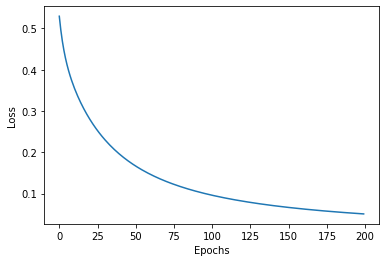

Final weights:
[[ 2.76500367]
 [-5.96064411]]


In [ ]:
# Run train function on our "NOT" gate inputs and outputs

# We redefine inputs and expected outputs in case they have been erased or modified
X = np.array([[1],[0]])
Y = np.array([[0],[1]])

# We train the neural network (a single neuron in that case)
W = train(X, Y, nb_neurons, activation = sigmoid, loss = log_loss, loss_grad = log_loss_grad, metric = binary_accuracy, epochs=200, learning_rate=.5) # You can play with different epochs values

print("Final weights:\n{}".format(W))

**Let's observe:** the gradient descent process
We start with weights w1=9 and w0=-9

During the first step, the gradient is high so the learning is fast (each cross is separated by large space), but as the learning progresses is slows down (crosses are closer to each other)

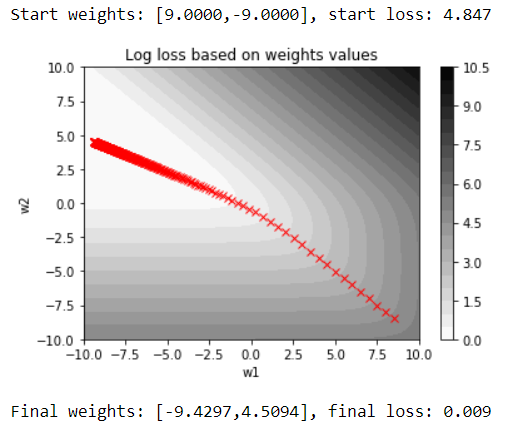

## **Exercise 3. Let's test our neural network on images**

#### On the MNIST dataset with handmade Neural network
- 3.1. Load the data set (done)
- 3.2. Display images (done)
- 3.3. Train your network
- 3.4. Make predictions
- 3.5. Measure the accuracy

In [ ]:
# 3.1
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [ ]:
# 3.2.1
# Display images
imagesfig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
# 3.2.2
# Re-run several times to display several images
# Choose a train image at random
i = np.random.randint(0,X_train.shape[0]-1)
print("Input vector: {} ".format(X_train[13, 13]))

# Display image
plt.imshow(1.0-X_train[i,:].reshape(28,28),cmap="gray")
plt.show()

# Display label
print("Label: {}\nOutput vector: {} ".format(np.argmax(Y_train[i]),Y_train[i]))

In [ ]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows* img_cols) / 255
X_test = X_test.reshape(X_test.shape[0], img_rows* img_cols) / 255
X_train

### 3.3. Train your network on the MNIST data set
##### 3.3.1. Preliminary work 
We need to adapt all our functions and metrics to the multi-class classification use case because here we are predicting a class among: 0, 1, 2, 3, 4, 5, 6, 7, 8 & 9.

- Multi-class accuracy
- Activation function: softmax
This activation function takes multiple inputs and converts them so that the sum of each output sums up to 1

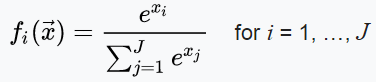

- Loss: categorical cross entropy & associated gradient

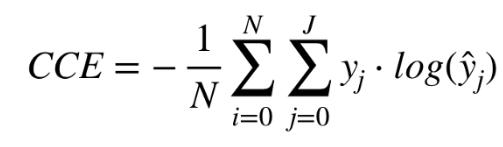

- Gradient of the categorical cross-entropy

In [ ]:
# 3.3.1 Preliminary work
def accur(Y_pred, Y):
    """Multi class accuracy"""
    return np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y,axis=1))

def softmax(x):
    """Activation softmax: convert outputs to probabilities summing to 1"""
    return np.exp(x) / snp.sum(np.exp(x), axis = 1).reshape(-1,1) # Use on the output .reshape(-1,1)
    
def cross_entropy(Y_pred, Y, X):
    """Cross entropy loss"""
    return -np.sum(np.log(Y_pred) * Y) / X.shape[0]

def cross_entropy_grad(Y_pred, Y, X):
    """Cross entropy gradient"""
    X_bias = np.insert(X, 0, 1, axis=1)
    return (-X_bias.t.dot(Y - Y_pred)) / X.shape[0]

#### 3.3.2. Input data reshaping

Reshape MNIST inputs to vector of length 784 (28*28) and scale to the [0-1] range

In [ ]:
# 3.3.2 
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols) / 255
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols) / 255

#### 3.3.3. Train your neural network

In [ ]:
# 3.3.3 Train the neural network
W = train(X_train, Y_train, 
          nb_neurons=10, 
          activation=softmax, 
          loss=cross_entropy, 
          loss_grad=cross_entropy_grad, 
          metric=accur,
          epochs=100,
          learning_rate=0.5)

### 3.4. Make a prediction

In [ ]:
# 3.4.1 Combine dot product computation and activation function
def predict(W, X, activation):
    return activation(compute(W,X))

In [ ]:
# 3.4.2 Predict test image
# Re-run several times to test several images

# Choose a test image at random
i = np.random.randint(0,X_test.shape[0]-1)

# Display image
plt.imshow(1.0-X_test[i,:].reshape(28,28),cmap="gray")
plt.show()

# Display label
print("Predicted label: {}\nActual label: {} ".format(np.argmax(predict(W,X_test[i].reshape(1,-1),softmax)),
                                                      np.argmax(Y_test[i])))

### 3.5. Measure the accuracy

In [ ]:
# 3.5
# Measure accuracy on the full test set which was not used during training
# This will tell us if the neural network is able to generalize properly
Y_pred = predict(W, X_test, softmax)
test_accur = accur(Y_pred,Y_test)
print("Accuracy on test set: {:.3f}".format(test_accur))

## **[OPTIONAL] Exercises to go further on the same logic** 
- Do nothing gate
- AND gate
- OR gate